In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-test-scores-of-students/test_scores.csv


In [2]:
df = pd.read_csv('../input/predict-test-scores-of-students/test_scores.csv')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [3]:
df.shape

(2133, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [5]:
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

## Feature and Target

In [6]:
y = df['posttest']
X = df.drop('posttest', axis=1)

In [7]:
y.head()

0    72.0
1    79.0
2    76.0
3    77.0
4    76.0
Name: posttest, dtype: float64

In [8]:
X.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0


In [9]:
X.groupby('school').agg('count')

,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest
school,,,,,,,,,
ANKYI,41,41,41,41,41,41,41,41,41
CCAAW,109,109,109,109,109,109,109,109,109
CIMBB,74,74,74,74,74,74,74,74,74
CUQAM,107,107,107,107,107,107,107,107,107
DNQDD,122,122,122,122,122,122,122,122,122
FBUMG,46,46,46,46,46,46,46,46,46
GJJHK,118,118,118,118,118,118,118,118,118
GOKXL,64,64,64,64,64,64,64,64,64
GOOBU,158,158,158,158,158,158,158,158,158


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
dtypes: float64(2), object(8)
memory usage: 166.8+ KB


In [12]:
object_columns = [col for col in X.columns if X[col].dtype == 'object']

In [13]:
object_columns

['school',
 'school_setting',
 'school_type',
 'classroom',
 'teaching_method',
 'student_id',
 'gender',
 'lunch']

In [14]:
for i in object_columns:
    print(i)
    print(X[i].unique())
    print('*'*60)

school
['ANKYI' 'CCAAW' 'CIMBB' 'CUQAM' 'DNQDD' 'FBUMG' 'GJJHK' 'GOKXL' 'GOOBU'
 'IDGFP' 'KFZMY' 'KZKKE' 'LAYPA' 'OJOBU' 'QOQTS' 'UAGPU' 'UKPGS' 'UUUQX'
 'VHDHF' 'VKWQH' 'VVTVA' 'ZMNYA' 'ZOWMK']
************************************************************
school_setting
['Urban' 'Suburban' 'Rural']
************************************************************
school_type
['Non-public' 'Public']
************************************************************
classroom
['6OL' 'ZNS' '2B1' 'EPS' 'IQN' 'PGK' 'UHU' 'UWK' 'A33' 'EID' 'HUJ' 'PC6'
 '1Q1' 'BFY' 'OMI' 'X6Z' '2AP' 'PW5' 'ROP' 'ST7' 'XXJ' '197' '5LQ' 'JGD'
 'HCB' 'NOR' 'X78' 'YUC' 'ZDT' 'ENO' 'TSA' 'VA6' '18K' 'CXC' 'HKF' 'PBA'
 'U6J' 'W8A' '05H' '98D' 'G2L' 'P2A' 'XZM' '1VD' '21Q' '2BR' '3D0' '5JK'
 'O6A' 'QTU' 'AJ1' 'J8J' 'RA5' '5SZ' '6U9' 'FS3' 'XJ8' '0N7' '3XJ' 'RK7'
 'SUR' 'X2O' 'XZ4' '1SZ' '62L' 'NWZ' 'S98' '08N' '9AW' 'IPU' 'KXB' 'PGH'
 'XXE' '6C1' 'AE1' 'H7S' 'P8I' 'SSP' 'CD8' 'J6X' 'KR1' '341' 'D33' 'DFQ'
 'GYM' 'IEM' '7BL' 'A

In [15]:
X = X.drop('classroom', axis=1)

In [16]:
X = X.drop('student_id', axis=1)
X.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0


In [17]:
object_cols = [col for col in X.columns if X[col].dtype=='object']

## LabelEncoding

In [18]:
from sklearn.preprocessing import LabelEncoder
label_X = X.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_X[col] = label_encoder.fit_transform(X[col])

In [19]:
label_X.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest
0,0,2,0,1,20.0,0,0,62.0
1,0,2,0,1,20.0,0,0,66.0
2,0,2,0,1,20.0,1,0,64.0
3,0,2,0,1,20.0,0,0,61.0
4,0,2,0,1,20.0,1,0,64.0


In [20]:
df2 = df.drop(['student_id', 'classroom'], axis=1)
df2.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [21]:
label_encoder = LabelEncoder()
for col in object_cols:
    df2[col] = label_encoder.fit_transform(X[col])

In [22]:
df2.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,0,2,0,1,20.0,0,0,62.0,72.0
1,0,2,0,1,20.0,0,0,66.0,79.0
2,0,2,0,1,20.0,1,0,64.0,76.0
3,0,2,0,1,20.0,0,0,61.0,77.0
4,0,2,0,1,20.0,1,0,64.0,76.0


<AxesSubplot:>

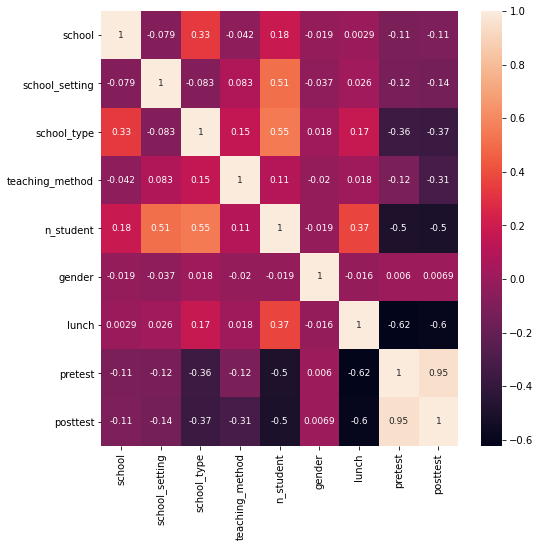

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df2.corr(), annot=True, annot_kws={'size':9}, xticklabels=df2.columns, yticklabels=df2.columns, ax=ax)

In [24]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


Text(0.5, 1.0, 'School Setting')

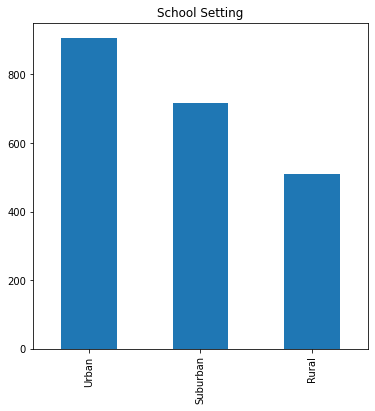

In [25]:
plt.figure(figsize=(6, 6))
df['school_setting'].value_counts().plot(kind='bar')
plt.title('School Setting')


In [26]:
print(df['school_type'].value_counts())

Public        1582
Non-public     551
Name: school_type, dtype: int64


In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = df['school_type'].value_counts().keys()
values = df['school_type'].value_counts()

# # Use `hole` to create a donut-like pie chart
# fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
# fig.show()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values, name="School Type"))
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="School Type")
fig.show()

In [28]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df['teaching_method'].value_counts().keys(), values=df['teaching_method'].value_counts(), name="Teaching Methods"))
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Teaching Methods")
fig.show()

In [29]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df['school_setting'].value_counts().keys(), values=df['school_setting'].value_counts(), name="School Setting"))
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="School Setting")
fig.show()

In [30]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df['lunch'].value_counts().keys(), values=df['lunch'].value_counts(), name="Lunch"))
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Lunch")
fig.show()

In [31]:
# student frequency
import plotly.express as px
fig = px.histogram(df['n_student'])
fig.update_layout(bargap=0.2)
fig.show()

In [32]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(label_X, y, random_state=0, test_size=0.25)

# DecisionTreeRegressor

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor()
model1.fit(train_x, train_y)


DecisionTreeRegressor()

In [34]:
pred_y1 = model1.predict(test_x)

In [35]:
mean_absolute_error(test_y, pred_y1)

3.205461922596754

In [36]:
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
r2_score(test_y, pred_y1)

0.9137581082292451

In [38]:
mean_squared_error(test_y, pred_y1)

16.560037973366626

In [39]:
def getting_error_metric(max_leaf_nodes, train_x, test_x, train_y, test_y):
    model2 = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model2.fit(train_x, train_y)
    pred_y2 = model2.predict(test_x)
    mae = mean_absolute_error(test_y, pred_y2)
    mse = mean_squared_error(test_y, pred_y2)
    r_square = r2_score(test_y, pred_y2)
    return mae, mse, r_square

for i in [5, 50, 500, 5000]:
    print('For max_leaf_nodes = ', i)
    print('MAE, MSE, R_Square', getting_error_metric(i, train_x, test_x, train_y, test_y))
    

For max_leaf_nodes =  5
MAE, MSE, R_Square (4.445965455803475, 29.851296152315346, 0.8445394717013831)
For max_leaf_nodes =  50
MAE, MSE, R_Square (2.7938347724230197, 11.986421437505772, 0.9375767337010597)
For max_leaf_nodes =  500
MAE, MSE, R_Square (3.1224250265511744, 15.621254646780141, 0.9186471338569563)
For max_leaf_nodes =  5000
MAE, MSE, R_Square (3.207958801498127, 16.485131606325428, 0.9141482079868481)


Highest accuracy using max_leaf_nodes = 50

In [40]:
label_X.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest
0,0,2,0,1,20.0,0,0,62.0
1,0,2,0,1,20.0,0,0,66.0
2,0,2,0,1,20.0,1,0,64.0
3,0,2,0,1,20.0,0,0,61.0
4,0,2,0,1,20.0,1,0,64.0


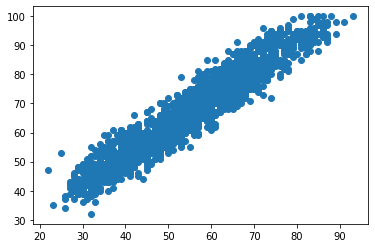

In [41]:
plt.scatter(X['pretest'], y)

# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()

model3.fit(train_x, train_y)

LinearRegression()

In [43]:
pred_y3 = model3.predict(test_x)
mean_absolute_error(test_y, pred_y3)


2.7316230930332295

In [44]:
r2_score(test_y, pred_y3)

0.9410523377536963

Linear Regression gave a better output than the decision tree

# RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

model4 = RandomForestRegressor(random_state=0)
model4.fit(train_x, train_y)
pred_y4 = model4.predict(test_x)

print('Mean Absolute Error = {}, Mean Squared Error = {}, R^2 = {}'.format(mean_absolute_error(test_y, pred_y4), mean_squared_error(test_y, pred_y4), r2_score(test_y, pred_y4)))

Mean Absolute Error = 2.750144877490383, Mean Squared Error = 11.648815724526596, R^2 = 0.9393349274568207


Using parameter n_estimators

In [46]:
def get_metrics_rf(n_estimator, train_x, test_x, train_y, test_y):
    model5 = RandomForestRegressor(n_estimators = n_estimator, random_state=0)
    model5.fit(train_x, train_y)
    pred_y5 = model5.predict(test_x)
    return mean_absolute_error(test_y, pred_y5), mean_squared_error(test_y, pred_y5), r2_score(test_y, pred_y5)

estimators = [int(i) for i in np.linspace(start=100, stop=500, num=10)]
for i in estimators:
    print('n_estimators value = ',i)
    print('The MAE, MSE, R^2 values are ', get_metrics_rf(i, train_x, test_x, train_y, test_y))

n_estimators value =  100
The MAE, MSE, R^2 values are  (2.750144877490383, 11.648815724526596, 0.9393349274568207)
n_estimators value =  144
The MAE, MSE, R^2 values are  (2.750403072761843, 11.642417357478768, 0.93936824907597)
n_estimators value =  188
The MAE, MSE, R^2 values are  (2.746427366058164, 11.590253462111354, 0.9396399098671985)
n_estimators value =  233
The MAE, MSE, R^2 values are  (2.7470535967883705, 11.592903376965415, 0.9396261095564497)
n_estimators value =  277
The MAE, MSE, R^2 values are  (2.7439421334287073, 11.546311661122866, 0.9398687513741537)
n_estimators value =  322
The MAE, MSE, R^2 values are  (2.742976346210609, 11.531544760933048, 0.9399456549060181)
n_estimators value =  366
The MAE, MSE, R^2 values are  (2.7408074244220404, 11.529168561020366, 0.939958029755401)
n_estimators value =  411
The MAE, MSE, R^2 values are  (2.7375348561787503, 11.518751652753402, 0.9400122792611564)
n_estimators value =  455
The MAE, MSE, R^2 values are  (2.736383383357

In [47]:
random_forest = RandomForestRegressor(n_estimators = 500, random_state=0)
random_forest.fit(train_x, train_y)
predictions_y = random_forest.predict(test_x)
print(r2_score(test_y, predictions_y))

0.9401271451492685


In [48]:
import joblib
joblib.dump(random_forest, 'predict_test_scores')

['predict_test_scores']

In [49]:
!ls

__notebook__.ipynb  predict_test_scores
